In [ ]:
#importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
import wordcloud
from wordcloud import WordCloud
import re
from pylab import rcParams

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABHISHEK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# loading raw dataset
set1 = pd.read_csv("backup_data3.csv") 
set2 = pd.read_csv("backup_data21.csv") 
set3 = pd.read_csv("backup_data23.csv") 

In [3]:
#initializing new dataframe
dset=pd.DataFrame({})


In [4]:
# merging dataset to careate a huge dataset
dataset=dset.append(set1, ignore_index = True)
dset=dataset
dataset=dset.append(set2, ignore_index = True)
dset=dataset
dataset=dset.append(set3, ignore_index = True)
dset=dataset

In [5]:
dset

,Unnamed: 0,data
0,0,5\nGreat product\nI've been using this product...
1,1,5\nHighly recommended\nGood battery 🔋 👌\nSound...
2,2,5\nExcellent\nThis is my first OnePlus product...
3,3,5\nSuper!\nVery nice product with amazing batt...
4,4,5\nAwesome\nExcellent quality.. Packing is awe...
...,...,...
48988,16942,4\nVery Good\nAwesome product\nFlipkart Custom...
48989,16943,4\nGood\nLook & performance is good\nShiva G\n...
48990,16944,"4\nGood choice\nNice one ,,, best built qualit..."
48991,16945,4\nWonderful\nGood product\nGovardhan Volvoika...


In [6]:
#dropping uselss columns
dset=dset.drop('Unnamed: 0',axis=1)

In [7]:
#saving dataset for future use
dataset.to_csv('data_f.csv')

In [8]:
dset

,data
0,5\nGreat product\nI've been using this product...
1,5\nHighly recommended\nGood battery 🔋 👌\nSound...
2,5\nExcellent\nThis is my first OnePlus product...
3,5\nSuper!\nVery nice product with amazing batt...
4,5\nAwesome\nExcellent quality.. Packing is awe...
...,...
48988,4\nVery Good\nAwesome product\nFlipkart Custom...
48989,4\nGood\nLook & performance is good\nShiva G\n...
48990,"4\nGood choice\nNice one ,,, best built qualit..."
48991,4\nWonderful\nGood product\nGovardhan Volvoika...


In [9]:
#extracting useful data from raw dataset
ratings=[]
reviews=[]
temp=[]
for i in dset['data']:
    temp=i.splitlines()
    ratings.append(temp[0])
    reviews.append(temp[2])
    

In [10]:
ratings

['5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '1',
 '4',
 '2',
 '1',
 '5',
 '5',
 '4',
 '5',
 '5',
 '4',
 '4',
 '1',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '4',
 '5',
 '3',
 '5',
 '4',
 '5',
 '5',
 '4',
 '4',
 '5',
 '4',
 '4',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '3',
 '5',
 '3',
 '5',
 '4',
 '5',
 '3',
 '5',
 '5',
 '3',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '1',
 '3',
 '5',
 '5',
 '5',
 '1',
 '4',
 '5',
 '5',
 '5',
 '3',
 '5',
 '5',
 '5',
 '4',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '3',
 '5',
 '3',
 '3',
 '4',
 '4',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '1',
 '4',
 '5',
 '5',
 '4',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '1',
 '5',
 '5',
 '1',
 '5',
 '1',
 '5',
 '5',
 '5',
 '5',
 '5',
 '1',
 '1',
 '5',
 '1',
 '5',
 '5',
 '1',
 '1',
 '4',
 '5',
 '1',
 '5',
 '1',
 '5',
 '1',
 '1',
 '1',
 '4',
 '1',
 '5',
 '5',
 '4',
 '2',
 '4',
 '5',
 '1',
 '4',
 '1',
 '5',
 '1',
 '1',
 '2',
 '5',
 '5',
 '5',
 '5',
 '1',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '3'

In [11]:
#creating train dataset with useful data
train=pd.DataFrame({})
train['Reviews']=reviews
train['ratings']=ratings

In [12]:
#saving train dataset
train.to_csv('train_f.csv')

In [13]:
train.shape

(48993, 2)

In [14]:
train.head()

,Reviews,ratings
0,I've been using this product for the last 3 da...,5
1,Good battery 🔋 👌,5
2,This is my first OnePlus product and now I'm i...,5
3,Very nice product with amazing battery back up...,5
4,Excellent quality.. Packing is awesome.. Neckb...,5


In [15]:
#checking duplicate data
train['Reviews'].duplicated().sum()

18088

In [16]:
#removing duplicated data
train.drop_duplicates()

,Reviews,ratings
0,I've been using this product for the last 3 da...,5
1,Good battery 🔋 👌,5
2,This is my first OnePlus product and now I'm i...,5
3,Very nice product with amazing battery back up...,5
4,Excellent quality.. Packing is awesome.. Neckb...,5
...,...,...
48985,"Good product got it for 799, after full rechar...",4
48986,Superb item.,4
48987,good but taken long time to charging...,4
48989,Look & performance is good,4


In [17]:
train['ratings'].value_counts()

5    17789
4    10575
1    10130
3     5410
2     5089
Name: ratings, dtype: int64

In [18]:
#creating a dummy dataset
dum=pd.DataFrame({})
dum['ratings']=train['ratings']
dum['reviews']=train['Reviews']

In [19]:
#converting ratings to int 
dum.ratings = dum.ratings.astype('int64')

In [20]:
#balancing dataset
dum.drop(dum[dum['ratings']==1].tail(dum[dum['ratings']==1].shape[0]-5089).index,
        inplace = True)
dum.drop(dum[dum['ratings']==3].tail(dum[dum['ratings']==3].shape[0]-5089).index,
        inplace = True)
dum.drop(dum[dum['ratings']==4].tail(dum[dum['ratings']==4].shape[0]-5089).index,
        inplace = True)
dum.drop(dum[dum['ratings']==5].tail(dum[dum['ratings']==5].shape[0]-5089).index,
        inplace = True)

In [21]:
#saving balanced dataset with 5089 rows of each rating
dum.to_csv('train_adj2.csv')

In [22]:
# initiating nlp process
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

In [23]:
#loding balanced dataset
df = pd.read_csv('train_adj2.csv')

In [24]:
# removing unnamed column
df.reset_index(inplace=True,drop=True)
df.drop(['Unnamed: 0'], inplace= True, axis=1)

In [25]:
print("Shape of the DataFrame:",df.shape)
df.sample(5)

Shape of the DataFrame: (25445, 2)


,ratings,reviews
16481,2,Good product
19939,2,It automatically gets discharged. Not able to ...
24777,3,"Compare to old model, this is worst in perform..."
20155,2,"Charges Can Only Be 4,000 MAh Battery At a One..."
9410,4,"Display , battery life is good, front camera a..."


<AxesSubplot:xlabel='ratings', ylabel='count'>

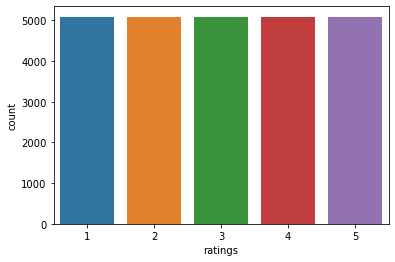

In [26]:
# we can see the balanced dataset

sns.countplot(df.ratings)

In [27]:
#function to replace string to number
def custom_encoder(df):
    df.replace(to_replace ="1", value =1, inplace=True)
    df.replace(to_replace ="2", value =2, inplace=True)
    df.replace(to_replace ="3", value =3, inplace=True)
    df.replace(to_replace ="4", value =4, inplace=True)
    df.replace(to_replace ="5", value =5, inplace=True)
    

In [28]:
custom_encoder(df['ratings'])

In [29]:

#object of WordNetLemmatizer
lm = WordNetLemmatizer()

In [30]:

def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus


In [31]:
corpus = text_transformation(df['reviews'])

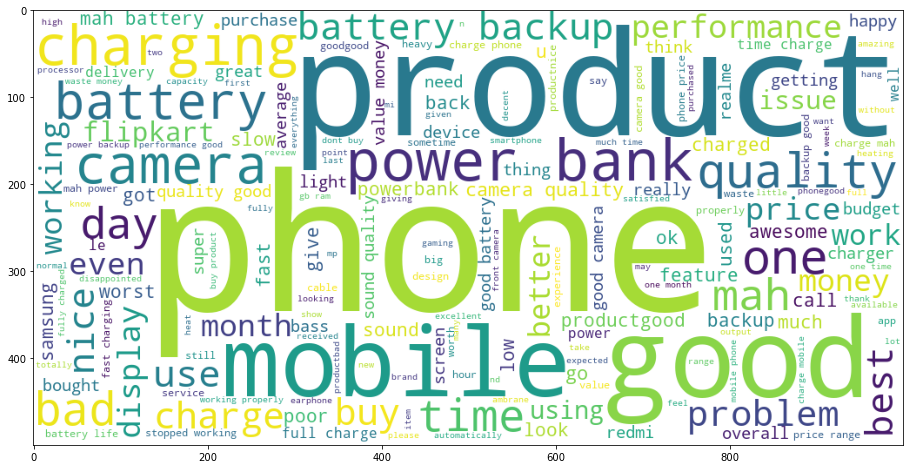

In [32]:
#we will create a Word Cloud
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [33]:
#bag of words
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.ratings

In [49]:
parameters = {'max_features': ['sqrt'],
             'n_estimators': [10,50,100],
             'max_depth': [2,4,6],
             'min_samples_split': [2],
             'min_samples_leaf': [1, 2],
             'bootstrap': [True]}

In [50]:
# hyper parameter tuning
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=3,return_train_score=True,n_jobs=2)
grid_search.fit(X,y)
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [51]:
#displaying the result
for i in range(432):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Mean Test Score:  0.2490071268413503
Rank:  18
Parameters:  {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Test Score:  0.3157403787669574
Rank:  12
Parameters:  {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Test Score:  0.35680909015193474
Rank:  7
Parameters:  {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
Mean Test Score:  0.2508950962164313
Rank:  17
Parameters:  {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Mean Test Score:  0.32332492889983827
Rank:  11
Parameters:  {'bootstrap': True, 'max_depth': 2, 'max_features'

IndexError: list index out of range

In [52]:
#using random forest classifier as our model
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])
rfc.fit(X,y)

RandomForestClassifier(max_depth=6, max_features='sqrt')

In [55]:
#loading test dataset
test_df = pd.read_csv('test_adj2.csv')

In [56]:
test_df

,Unnamed: 0,ratings,reviews
0,0,5,One of the best product in this price.
1,1,4,I am buy first time blutooth speaker for home ...
2,2,5,Very good and amazing product the build qualit...
3,3,5,First of all I would like to tell about this p...
4,4,5,The bass is really good.. it gets charged so q...
...,...,...,...
2454,4443,4,Nic products but not verry 🙂 nic
2455,4448,4,Bass is very good .Best product
2456,4460,4,But the charging cable is so small please thin...
2457,4461,4,Nic products but not verry 🙂 nic


In [57]:
# dropping umwanted columns
test_df.drop(['Unnamed: 0'], inplace= True, axis=1)
test_df

,ratings,reviews
0,5,One of the best product in this price.
1,4,I am buy first time blutooth speaker for home ...
2,5,Very good and amazing product the build qualit...
3,5,First of all I would like to tell about this p...
4,5,The bass is really good.. it gets charged so q...
...,...,...
2454,4,Nic products but not verry 🙂 nic
2455,4,Bass is very good .Best product
2456,4,But the charging cable is so small please thin...
2457,4,Nic products but not verry 🙂 nic


In [58]:
# getting test  dataset ready for prediction
X_test,y_test = test_df.reviews,test_df.ratings
#encode the labels into two classes , 0 and 1
test_df = custom_encoder(y_test)
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = rfc.predict(testdata)

Accuracy_score:  0.5677104514030094
Precision_score:  0.5677104514030094
Recall_score:  0.5677104514030094
--------------------------------------------------
              precision    recall  f1-score   support

           1       0.17      0.54      0.25        37
           2       0.03      0.30      0.05        20
           3       0.24      0.14      0.18        69
           4       0.25      0.05      0.08       798
           5       0.68      0.86      0.76      1535

    accuracy                           0.57      2459
   macro avg       0.27      0.38      0.27      2459
weighted avg       0.52      0.57      0.51      2459



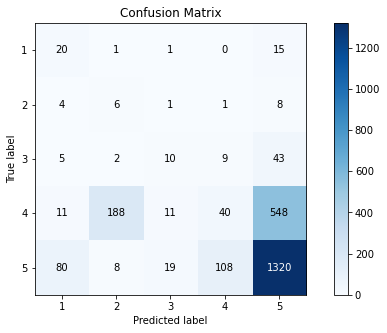

In [61]:
#generating classification report
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions,pos_label='positive',
                                           average='micro')
rec_score = recall_score(y_test,predictions,pos_label='positive',
                                           average='micro')
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

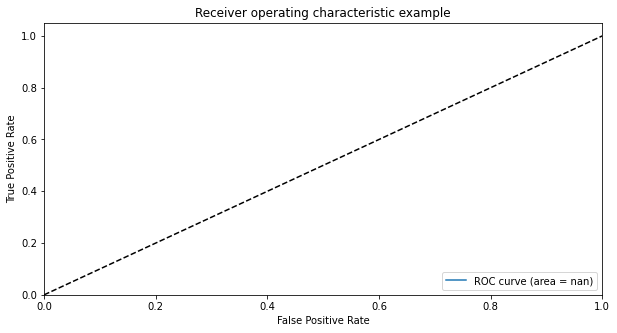

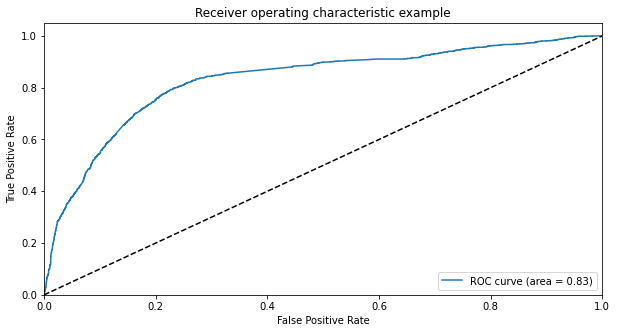

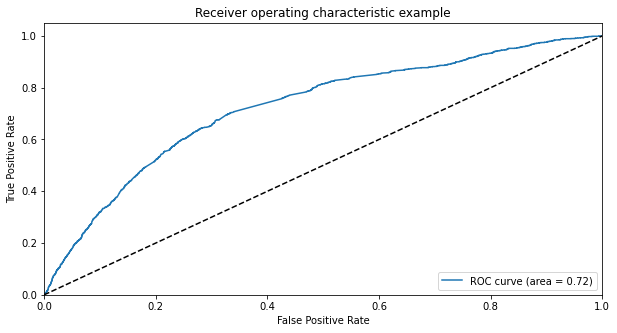

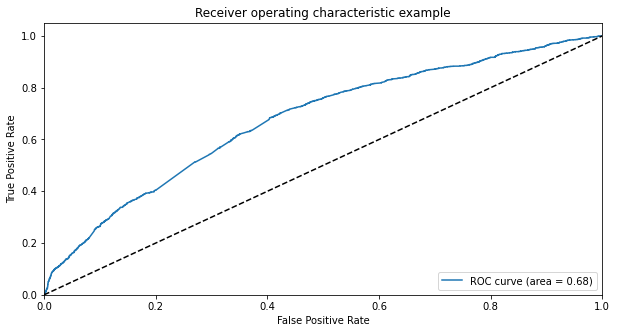

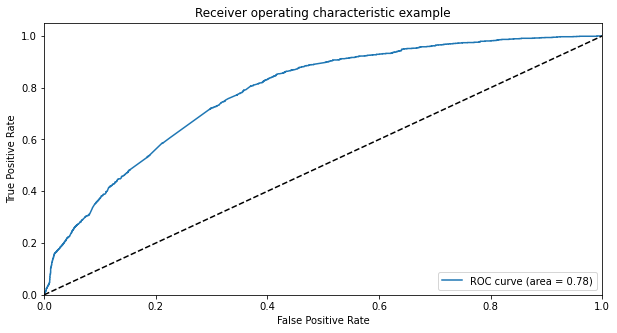

In [120]:
#generating  roc curve
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



y = label_binarize(y, classes=[1,2,3,4,5])
n_classes = 5

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


In [69]:

def expression_check(prediction_input):
    if prediction_input == 1:
        print("1")
    elif prediction_input == 2:
        print("2")
    elif prediction_input == 3:
        print("3")
    elif prediction_input == 4:
        print("4")
    elif prediction_input == 5:
        print("5")
    else:
        print("Invalid Statement.")

In [70]:
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = rfc.predict(transformed_input)
    expression_check(prediction)

In [115]:
#passing hardcoded values to test 
input1 = ["It' is chage in 10-15 min and battery backup just for maximum 35-40 min..not satisfied"]
input2 = ["terrible product"]
input3 = ["Honestly reviews u.. Sound is okk Battery okk But design not comfortable Not properly saty ear buds in ear.."]
input4 = ["Best product you can buy in this price range. Sound quality is good and connecting speed is really fast and battery backup is also good."]
input5 = ["One of the earphone stop working after 10 days, now i can't even replace it because return police is expired now. Don't buy this product waste of money, i regret buying it..."]


In [121]:
#predicting values based on input
sentiment_predictor(input1)
sentiment_predictor(input2)
sentiment_predictor(input3)
sentiment_predictor(input4)
sentiment_predictor(input5)



2
5
2
5
1


# conclusion
The project is based on doing sentiment analysis on review and providing related ratings .
random forest classifier has been used which provided 57 % accuracy 
and as per tests the model provides a fair accuracy.although the accuracy can be inproved by adding a lot of data to help model understand the ratings based on reviews
there is a huge scope of imporvement.

